### Exercise 3: Data Smoothing with Fourier Transforms

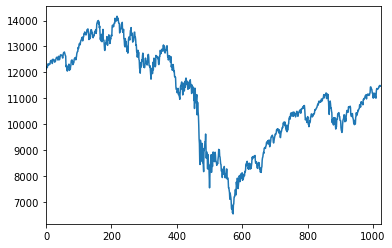

In [1]:
#(i):
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# DFT of example signal

y = np.loadtxt("dow.txt", float)

# plotting the original signal: wavelike shape with noise
plt.plot(y)
plt.xlim(0,1024)
plt.show()

c = 1024 [11283903.94           -0.j           684127.73979081-955087.51914779j
  -419226.20512243 +92908.95615825j ...    74190.14983158+273812.25003958j
  -419226.20512243 -92908.95615825j   684127.73979081+955087.51914779j]


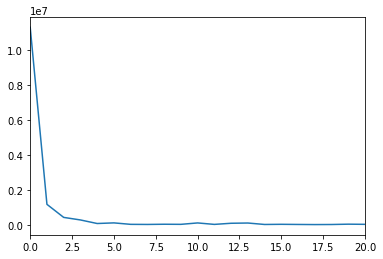

D:\Python\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


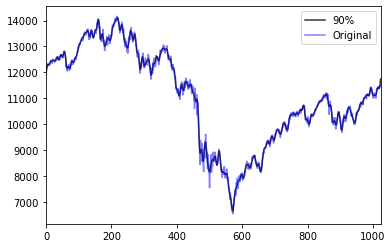

In [2]:
#(ii):
# performing the DFT with SciPy

from scipy.fftpack import fft, ifft

c = fft(y)
print('c =', len(c), c)
# plotting absolute value of Fourier coefficients
# the coefficients are in general complex!
plt.plot(np.abs(c))
plt.xlim(0,20)       # the second half of the interval is just mirrored 
                      # (because the signal is a real function)
plt.show()

# removing secondary peaks -> denoising

cmod = c
cmod[102:922] = 0   # removed most of the coefficients between big peaks
# note that we are keeping 20 values at the beginning *and at the end*
# because the coefficients are mirror symmetric\

ymod = ifft(cmod)

plt.plot(ymod, 'k-', alpha = 0.8, label = '90%')
plt.plot(y, 'b-', alpha = 0.5, label = 'Original')
plt.legend()
plt.xlim(0,1024)
plt.show()

D:\Python\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


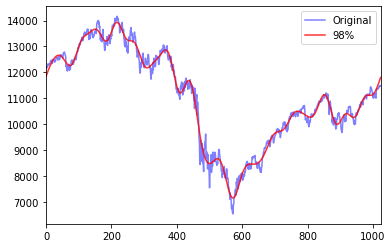

In [3]:
#(iii):
cmod2 = c
cmod2[20:1005] = 0

ymod2 = ifft(cmod2)

plt.plot(y, 'b-', alpha = 0.5, label = 'Original')
plt.plot(ymod2, 'r-', alpha = 0.8, label = '98%')
plt.legend()
plt.xlim(0,1024)
plt.show()